In [20]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [21]:
#Loading in data from sklearn
dataset = sk.datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

In [22]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [33]:
N_train = X_train.shape[0]
N_val = X_train.shape[0]
d = X.shape[0]

In [24]:
#Normalize Data
X_train = (X_train - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)
X_test = (X_test - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)

In [25]:
#Insert leading 1's to create augmented matrix 
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

In [26]:
#Sigmoid Function
def sigmoid(u):
    exp_u = np.exp(u)
    return exp_u/(1+exp_u)

In [27]:
#Cross Entropy Loss Function
def cross_entropy(p,q):
    return -p*np.log(q) - (1-p)*np.log(1-q)

In [47]:
#Objective Function
def L(beta,X,y):
    N = X.shape[0]
    s = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        #Prediction Function
        u = beta @ xiHat
        yi_pred = sigmoid(u)
        
        #Calculating the loss
        s += cross_entropy(yi,yi_pred)
    
    #Returns the average loss 
    return s / N 

In [48]:
#Calculate Gradient
def grad_L(beta,X,y):
    N = X.shape[0]
    grad = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        u = xiHat @ beta
        yi_pred = sigmoid(u)
        
        grad = grad + np.outer((sigmoid(u) - yi), xiHat)
        
    return grad / N 

In [85]:
#Logistic Regression using Stochastic Gradient Descent
def BinaryLogReg_StochasticGradientDescent(X,y):
    num_epochs = 100
    batch_size = 64
    alpha = 0.001
    N = X.shape[0]
    d = X.shape[1] - 1
    
    beta = np.zeros((d+1))
    
    L_vals = np.zeros(num_epochs)
    
    for ep in range(num_epochs):
        L_vals[ep] = L(beta,X,y)
        
        prm = np.random.permutation(N)
        
        batch_idx = 0
        
        print('| Epoch : ' + str(ep) + ' | Loss : ' + str(L_vals[ep]))
        for start_idx in range(0,N,batch_size):
            stop_idx = start_idx + batch_size 
            stop_idx = min(stop_idx,N)
            
            num_examples_in_batch = stop_idx - start_idx 
            
            grad = np.zeros(d+1)
            
            for i in prm[start_idx : stop_idx]:
                xiHat = X[i]
                yi = y[i]
                
                grad += sigmoid(np.vdot(xiHat,beta) - yi)*xiHat
                
            grad = grad / num_examples_in_batch
            
            beta = beta - alpha * grad 
            
            batch_idx += 1 
            
    return beta, L_vals

In [86]:
#Function to make preductions
def make_predictions(beta, X):

    N = X.shape[0]
    y_pred = np.zeros(N)
    
    for i in range(N):
        
        xiHat = X[i]
        yi_pred = sigmoid(np.vdot(xiHat, beta))
        
        y_pred[i] = np.round(yi_pred)
        
    return y_pred

In [87]:
beta, L_vals = BinaryLogReg_StochasticGradientDescent(X_train,y_train) 

| Epoch : 0 | Loss : 0.6931471805599468
| Epoch : 1 | Loss : 0.6907129966620946
| Epoch : 2 | Loss : 0.6878583067371753
| Epoch : 3 | Loss : 0.6844801416533871
| Epoch : 4 | Loss : 0.6826098279843944
| Epoch : 5 | Loss : 0.6795120730630344
| Epoch : 6 | Loss : 0.677055648616158
| Epoch : 7 | Loss : 0.673471604325928
| Epoch : 8 | Loss : 0.6719424480635658
| Epoch : 9 | Loss : 0.6688485936378341
| Epoch : 10 | Loss : 0.6663596283829611
| Epoch : 11 | Loss : 0.6646262411915391
| Epoch : 12 | Loss : 0.6630598039845518
| Epoch : 13 | Loss : 0.6618229035214759
| Epoch : 14 | Loss : 0.6587180000411991
| Epoch : 15 | Loss : 0.6570397272652474
| Epoch : 16 | Loss : 0.6550115288704204
| Epoch : 17 | Loss : 0.6537104060349799
| Epoch : 18 | Loss : 0.6518151460174486
| Epoch : 19 | Loss : 0.6502468702573777
| Epoch : 20 | Loss : 0.6483477521337268
| Epoch : 21 | Loss : 0.646559845011858
| Epoch : 22 | Loss : 0.6446592746431844
| Epoch : 23 | Loss : 0.6431870663951436
| Epoch : 24 | Loss : 0.64194

Text(0.5, 1.0, 'Objective Loss over n Iterations')

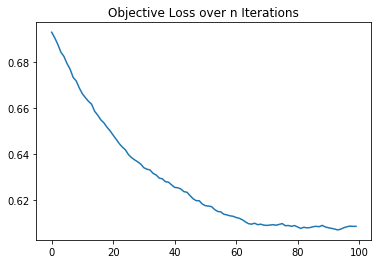

In [88]:
plt.plot(L_vals)
plt.title('Objective Loss over n Iterations')

In [89]:
#Calculate Predictions
y_pred = make_predictions(beta,X_test)

In [90]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1])

In [80]:
accuracy = np.sum(y_test == y_pred)/len(y_pred)
print('accuracy on validation dataset: ', accuracy)

accuracy on validation dataset:  0.35964912280701755
